## Working with Social Graphs

#### Introduction
Social networks have become a fixture of modern life, thanks to social networking sites such
as Facebook and Twitter. Social networks themselves are not new, however. The study of such networks dates back to the early twentieth century, particularly in the fields of sociology and anthropology. It is their prevalence in mainstream applications that has moved these types of studies to the purview of data science

### Use of Graph Theory
The basis for the analyses in this chapter comes from graph theory—the mathematical study of the application and properties of graphs, originally motivated by the study of games of chance. Generally speaking, this involves the study of network encoding and measuring properties of a graph. Graph theory can be traced back to Euler's work on the Seven Bridges of Königsberg problem in the year 1735. However, in recent decades, the rise of the social network has influenced the discipline, particularly with computer science graph data structures and databases.
Let's start with a point of contention. What is the difference between a network and a graph?
The term graph can be used to imply visual representations of variables and functions, the mathematical concept of a set of nodes and edges, or the data structure based on that concept. Similarly, the term network has multiple definitions; it can be an interconnected system or a specialized type of mathematical graph. Therefore, either term, social network or social graph, is appropriate in this case, particularly as we are referring to the mathematical concept and data structure.

Graph problems generally fall into a few categories. Existence problems
attempt to determine if a node, path, or subgraph exists, particularly if there is a constraint. Construction problems focus on the construction of a graph, given a set of nodes and paths, within given constraints. Enumeration problems attempt to determine the list of vertices and relationships within a set of constraints. Finally, optimization problems determine the shortest path between two nodes.


## Preparing to work with Social Networks

The required external libraries for the tasks in this chapter are as follows:
f NetworkX
f matplotlib
f python-louvain

Make sure these are installed before continuing. You can install via "pip install networkx" or "sudo pip install networkx

##### The Dataset
The dataset we will explore in this chapter is fun. It's the Marvel Universe Social Graph dataset constructed by Cesc Rosselló, Ricardo Alberich, and Joe Miro as part of their research on disordered systems and neural networks (http://bioinfo.uib.es/~joemiro/marvel. html). They created the network by compiling characters with the comic books in which they appear; as it turns out, the network actually mimics a real-world social network. Since then, there have been many visualizations of, and other mashups using this famous dataset (as well as extensions). In this recipe, we will import the needed data into our Python environment.

In [15]:
import networkx as nx
import csv
import io

def graph_from_csv(path):
    graph = nx.Graph(name="Heroic Social Network")
    with open(path, 'r', newline='', encoding='utf-8') as data:
        reader = csv.reader(data)
        for row in reader:
            if len(row) >= 2:  # Ensure we have at least two elements to create an edge
                graph.add_edge(row[0], row[1])
    return graph



In [16]:
# Usage:
try:
    g = graph_from_csv("data/hero-network.csv")
    print(f"Graph created with {g.number_of_nodes()} nodes and {g.number_of_edges()} edges.")
except Exception as e:
    print(f"An error occurred: {e}")

Graph created with 6428 nodes and 167220 edges.


In [24]:
print(g)

Graph named 'Heroic Social Network' with 6428 nodes and 167220 edges


Every social network has as many egos as nodes. The neighbors of an ego are called alters. The definition of the ego subgraph is bound by an n-step neighborhood, defining how many hops away from the ego to include in the subgraph. NetworkX provides a very simple mechanism to extract an ego graph, as shown in the following command:

In this context:

"Actor" is a general term for a node in your network graph. In social network analysis, nodes often represent people, but they can represent any entity in your network.
In your specific case of a "Heroic Social Network", an actor would likely be a superhero or character in your network.

The nx.ego_graph(graph, actor, 1) function creates a subgraph centered around a specific node (the "ego" node) and including all nodes that are directly connected to it. Here's a breakdown:

graph is your full NetworkX graph object.
actor is the node you're focusing on (the "ego" node). This should be a specific node identifier from your graph, like a character's name.
1 is the radius of the ego network. A radius of 1 means it includes only the direct connections of the actor.

For example, if your graph represents connections between superheroes, and you want to see all heroes directly connected to "Spider-Man", you might use:

In [26]:
actors = list(g.nodes())
print(f"Total number of actors: {len(actors)}")
print("First 10 actors:", actors[:10])

Total number of actors: 6428
First 10 actors: ['hero1', 'hero2', 'LITTLE, ABNER', 'PRINCESS ZANDA', "BLACK PANTHER/T'CHAL", 'STEELE, SIMON/WOLFGA', 'FORTUNE, DOMINIC', 'ERWIN, CLYTEMNESTRA', 'IRON MAN/TONY STARK ', 'IRON MAN IV/JAMES R.']


In [27]:
sorted_actors = sorted(g.degree(), key=lambda x: x[1], reverse=True)
print("Top 10 most connected actors:")
for actor, degree in sorted_actors[:10]:
    print(f"{actor}: {degree} connections")

Top 10 most connected actors:
CAPTAIN AMERICA: 1908 connections
SPIDER-MAN/PETER PAR: 1737 connections
IRON MAN/TONY STARK : 1522 connections
THING/BENJAMIN J. GR: 1416 connections
MR. FANTASTIC/REED R: 1379 connections
WOLVERINE/LOGAN : 1371 connections
HUMAN TORCH/JOHNNY S: 1361 connections
SCARLET WITCH/WANDA : 1325 connections
THOR/DR. DONALD BLAK: 1289 connections
BEAST/HENRY &HANK& P: 1267 connections


In [28]:
actor = 'SPIDER-MAN/PETER PAR'
graph = g
ego = nx.ego_graph(graph, actor, 1)


to draw the graph of the ego network, we use the following function:

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_ego_graph(graph, character, hops=1):
    """
    Expecting a graph_from_gdf
    """
    # Get the Ego Graph and Position
    ego = nx.ego_graph(graph, character, hops)
    pos = nx.spring_layout(ego)
    plt.figure(figsize=(12,12))
    plt.axis('off')
    
    # Coloration and Configuration
    nx.set_node_attributes(ego, {character: {"TYPE": "center"}})
    valmap = {"comic": 0.25, "hero": 0.54, "center": 0.87}
    types = nx.get_node_attributes(ego, "TYPE")
    values = [valmap.get(types.get(node, "comic"), 0.25) for node in ego.nodes()]
    
    # Draw
    nx.draw_networkx_edges(ego, pos, alpha=0.4)
    nx.draw_networkx_nodes(ego, pos,
                           node_size=80,
                           node_color=values,
                           cmap=plt.cm.hot)
    plt.title(f"Ego Graph for {character}")
    plt.tight_layout()
    plt.show()



 The function does the following:
    1. Creates an ego network centered on the specified character.
    2. Assigns a layout to the ego network for visualization.
    3. Sets up a matplotlib figure for drawing.
    4. Assigns node types and colors based on predefined categories (comic, hero, center).
    5. Draws the network with edges and color-coded nodes.
    6. Displays the resulting visualization.

Let's take a look at the ego networks for LONGBOW/AMELIA GREER, starting with a one-hop network:

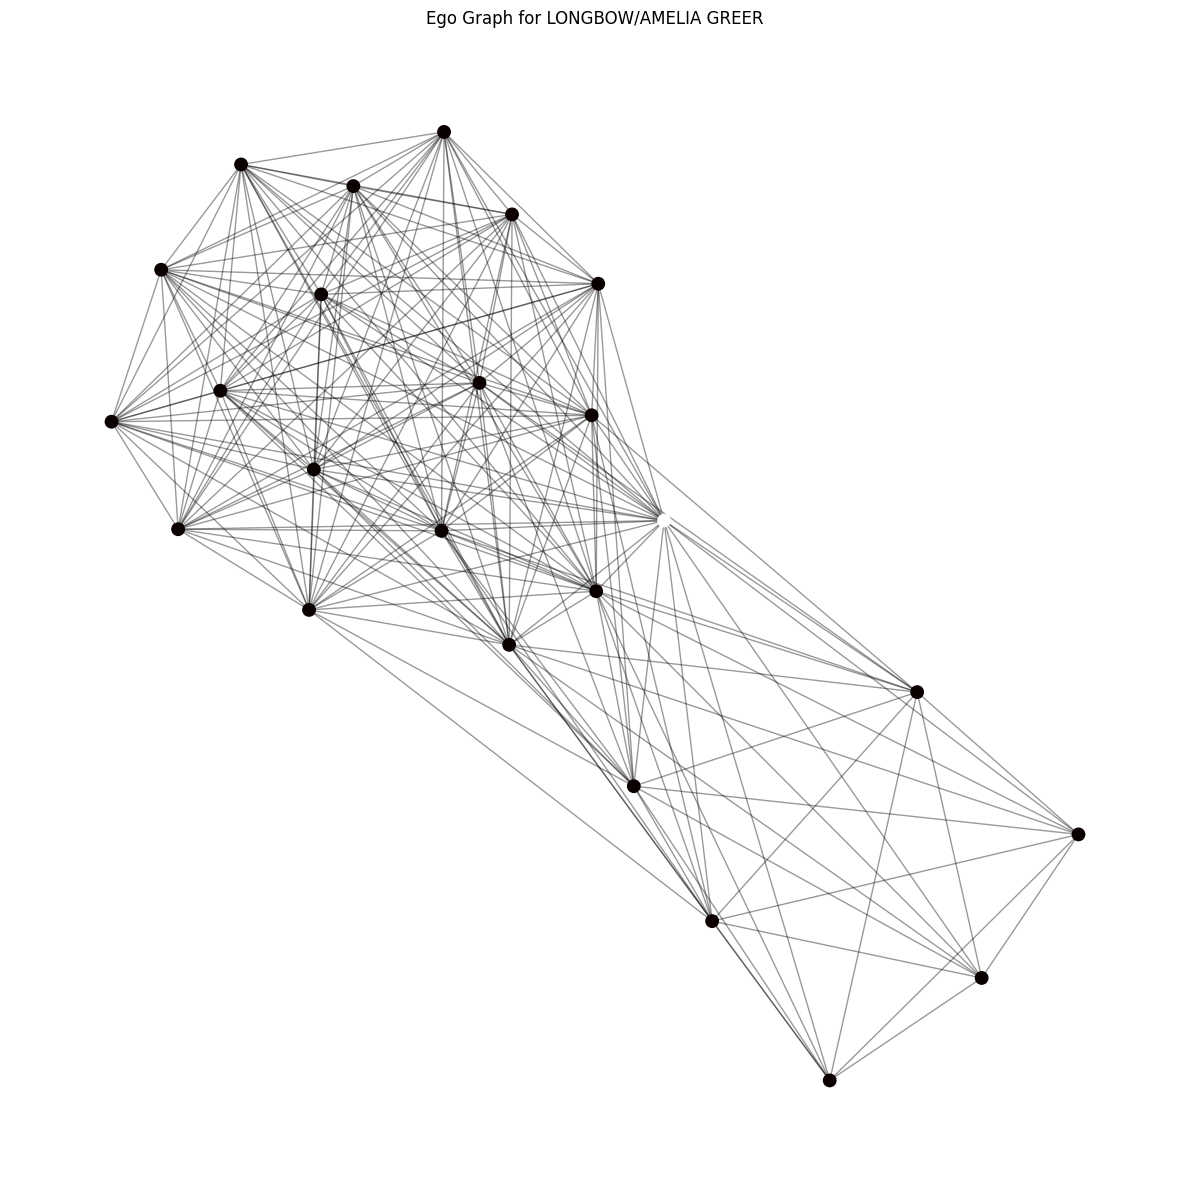

In [37]:
# Usage
draw_ego_graph(graph, "LONGBOW/AMELIA GREER")

The preceding figure shows this one-hop ego network, which is derived from the
expanded comic-to-hero social graph. Since there are two different types of nodes, we have visually colored them differently; orange nodes are characters and blue nodes are comic books. The ego node is white, LONGBOW/AMELIA GREER herself.
Let's create a two-hop ego network for the same character:


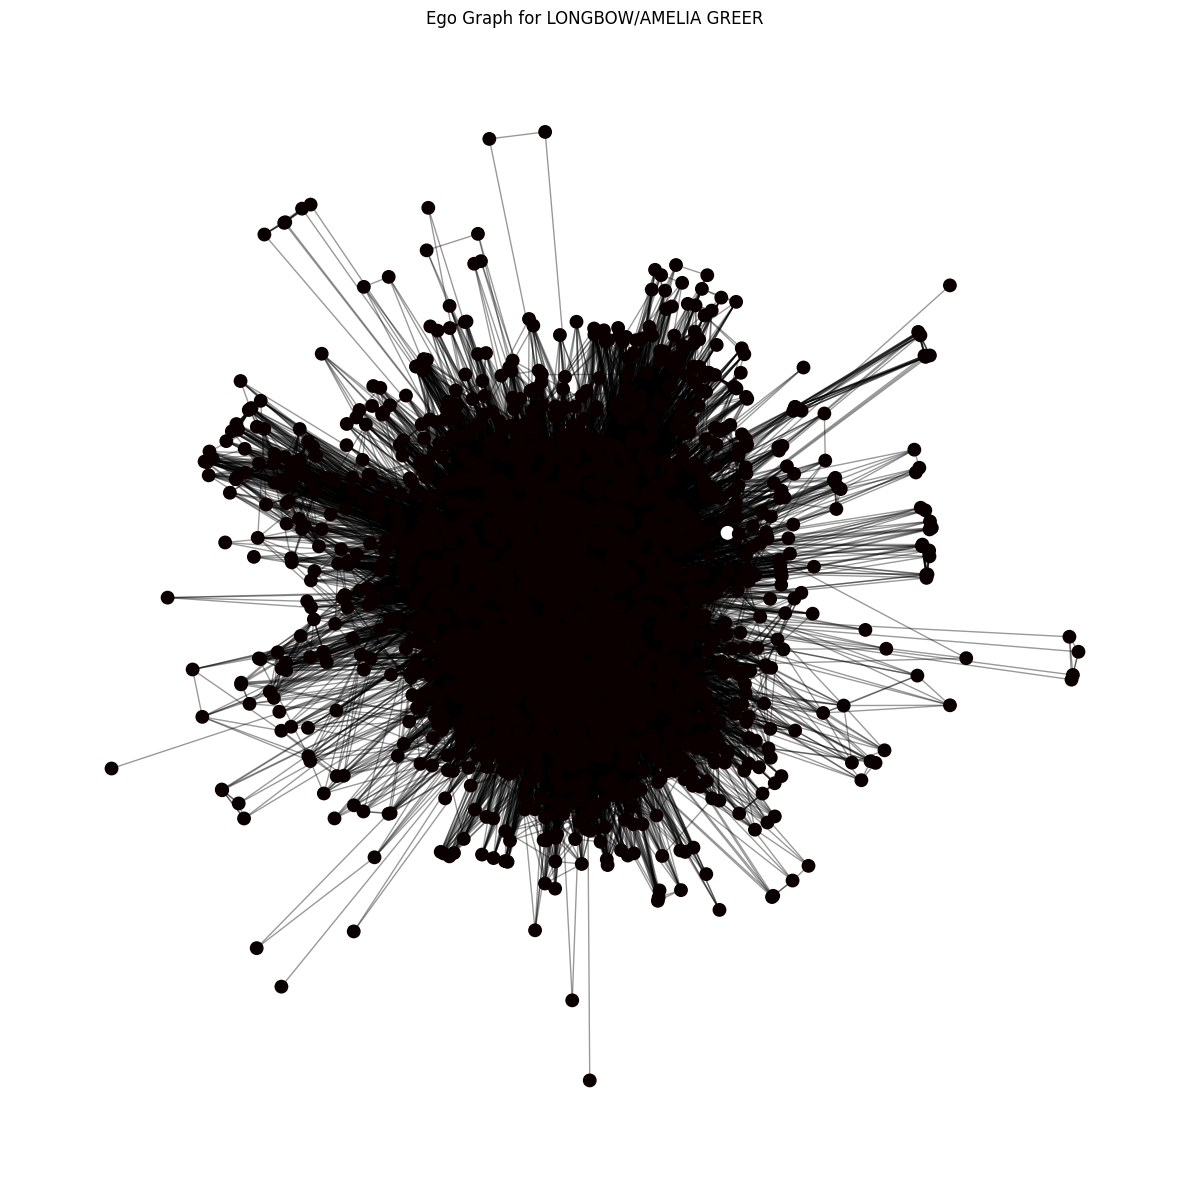

In [39]:
draw_ego_graph(graph, "LONGBOW/AMELIA GREER", 2)

Amelia Greer (also known as Longbow) is part of a mercenary special operations unit called the Harriers. She appears in two Marvel comics, particularly The Uncanny X-Men Vol 1 #261 in May of 1990. Her ego network is very close knit (containing mostly members from the Harriers), as you can see in the preceding one-hop network figure.
The preceding two-hop network considerably expands the volume of the network. The black nodes represent the second hop to the next comic book community of characters. Clusters are readily apparent, even in this small ego network. Still, even one-hop network can say a lot about group membership and the importance of an actor. We will talk about how to build such graphs later on in this chapter.


## Strong Ties in Our Network
Currently, our hero network simply measures whether two characters are connected. This
computation is simple; do they appear in the same comic book together? We assume that
in the small temporal space of a comic book, even cameos mean that the characters have interacted with each other. However, this does not tell us who the most important relations for a particular character are.
In order to determine the most important folks in an ego network (or to determine relative
affinity between two actors), we need to determine edge weights. Since edges represent interaction, affiliation, or social relations, adding a weight determines the distance between two actors, relative to other actors with similar connections. Proxies for edge weights in social networks include:
f Frequency, for example, how often two actors communicate
f Reciprocity, for example, whether or not the relationship is reciprocal
f Type or attributes, for example, married actors have a stronger tie than college roommates
f Structure of the neighborhood, for example, the number of mutual friends
In our heroic social graph, we'll use the number of comic books in which a pair of characters appears together as a proxy for the strength of their tie. This seems to make sense; if one character is a villain that appears in the same comics as a hero, their relationship is that of a nemesis, it's not a simple protagonist/antagonist relationship! Another example is that of two heroes appearing together often. They might be part of a heroic team (for example, The Avengers) or share a sidekick relationship (for example, Bucky to Captain America).

### Creating our helper functions
In order to compute the ties, we'll recreate the hero network graph from the comic hero network dataset. Since this represents an entire graph computation (for example, we will iterate through every node in the graph), we'll need to use a memory- safe iterator and save the intermediate data to disk. Here is the complete code; we'll go over it line by line, as follows:

In [51]:
import networkx as nx

def transform_to_weighted_heros(graph):
    # Create new graph to fill in
    heros = nx.Graph(name="Weighted Heroic Social Network")
    # Iterate through all the nodes and their properties
    for node, data in graph.nodes(data=True):
        # We don't care about comics, only heros
        if data['TYPE'] == 'comic': continue
        # Add the hero and their properties (this will also update data)
        heros.add_node(node, **data)
        # Find all the heros connected via the comic books
        for comic in graph[node]:
            for alter in graph[comic]:
                # Skip the hero that we're on
                if alter == node: continue
                # Setup the default edge
                if alter not in heros[node]:
                    heros.add_edge(node, alter, weight=0.0, label="knows")
                # The weight of the hero is the fraction of connections / 2
                heros[node][alter]["weight"] += 1.0 / (graph.degree(comic) * 2)
    return heros

This function transforms a bipartite graph of heroes and comics into a weighted graph of only heroes. The weight of connections between heroes is based on their shared comic book appearances.

In [58]:
import networkx as nx

def transform_to_weighted_heros(graph):
    # Create new graph to fill in
    heros = nx.Graph(name="Weighted Heroic Social Network")
    
    # Iterate through all the nodes
    for node in graph.nodes():
        heros.add_node(node, **graph.nodes[node])
        
        # Find all the nodes connected to this hero
        for neighbor in graph[node]:
            if neighbor != node:
                if neighbor not in heros[node]:
                    heros.add_edge(node, neighbor, weight=0.0, label="knows")
                
                # Increase the weight based on shared connections
                shared_connections = set(graph[node]) & set(graph[neighbor])
                weight_increase = len(shared_connections) / (graph.degree(node) * graph.degree(neighbor))
                heros[node][neighbor]["weight"] += weight_increase

    return heros

# Usage
g = graph_from_csv("data/hero-network.csv")
hero_graph = transform_to_weighted_heros(g)

# Analysis
print(f"Number of heroes: {hero_graph.number_of_nodes()}")
print(f"Number of connections between heroes: {hero_graph.number_of_edges()}")

if hero_graph.number_of_nodes() > 0:
    # Example: Find the hero with the most connections
    most_connected_hero = max(hero_graph.degree(), key=lambda x: x[1])
    print(f"Most connected hero: {most_connected_hero[0]} with {most_connected_hero[1]} connections")

    if hero_graph.number_of_edges() > 0:
        # Example: Find the strongest connection (highest weight)
        strongest_connection = max(hero_graph.edges(data=True), key=lambda x: x[2]['weight'])
        print(f"Strongest connection: {strongest_connection[0]} and {strongest_connection[1]} (weight: {strongest_connection[2]['weight']:.2f})")
    else:
        print("No connections between heroes found.")
else:
    print("No heroes found in the graph.")

Number of heroes: 6428
Number of connections between heroes: 167208
Most connected hero: CAPTAIN AMERICA with 1906 connections
Strongest connection: MICHAELS, DAWN and WOLMAN, GIDEON (weight: 0.50)


In [59]:
def draw_weighted_ego_graph(graph, character, hops=1):
    # Graph and Position
    ego = nx.ego_graph(graph, character, hops)
    pos = nx.spring_layout(ego)
    plt.figure(figsize=(12,12))
    plt.axis('off')
    # Coloration and Configuration
    ego.node[character]["TYPE"] = "center"
    valmap = { "hero": 0.0, "center": 1.0 }
    types  = nx.get_node_attributes(ego, "TYPE")
    values = [valmap.get(types[node], 0.25) for node in ego.nodes()]
    char_edges = ego.edges(data=True, nbunch=[character,])
    nonchar_edges = ego.edges(nbunch=[n for n in ego.nodes()
        if n != character])
    elarge=[(u,v) for (u,v,d) in char_edges if d['weight'] >=0.12]
    esmall=[(u,v) for (u,v,d) in char_edges if d['weight'] < 0.12]
    print(set([d['weight'] for (u,v,d) in char_edges]))
    # Draw
    nx.draw_networkx_nodes(ego, pos,
                            node_size=200,
                            node_color=values,
                            cmap=plt.cm.Paired,
                            with_labels=False)
    nx.draw_networkx_edges(ego,pos,edgelist=elarge,
                            width=1.5, edge_color='b')
    nx.draw_networkx_edges(ego,pos,edgelist=esmall,
                            width=1,alpha=0.5,
                            edge_color='b',style='dashed')
    nx.draw_networkx_edges(ego,pos,edgelist=nonchar_edges,
                        width=0.5,alpha=0.2,style='dashed')
    plt.show()


AttributeError: 'Graph' object has no attribute 'node'

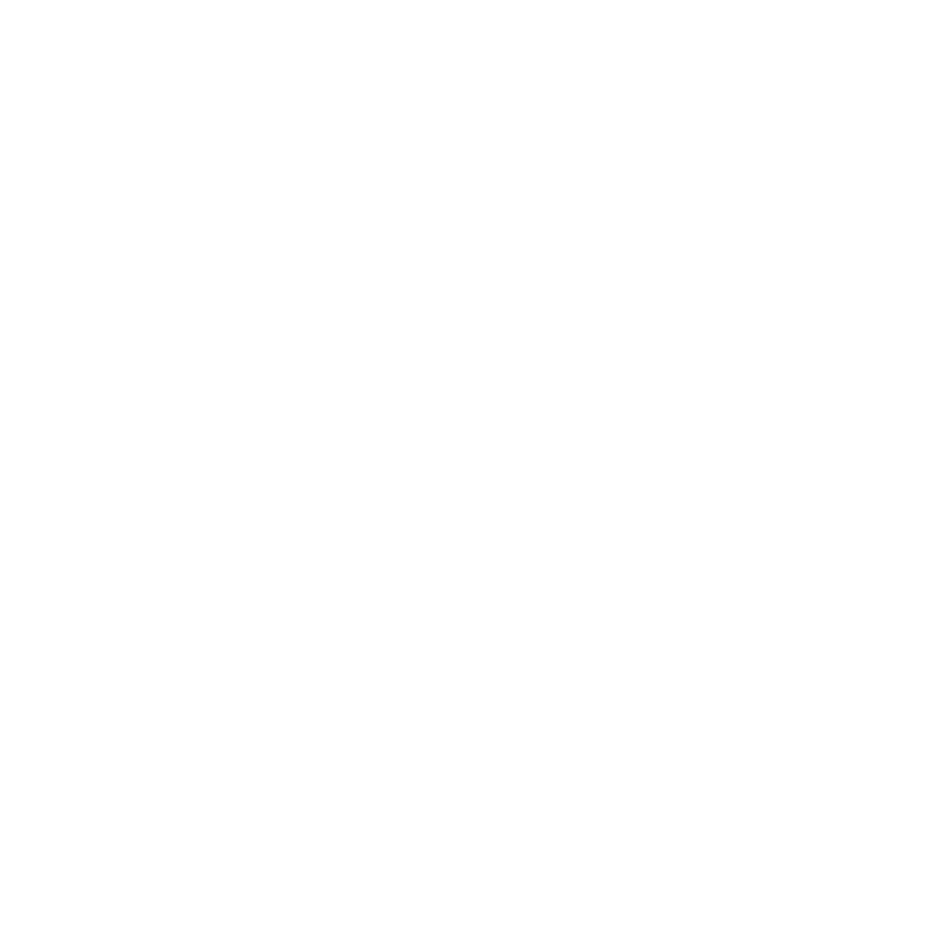

In [60]:
draw_weighted_ego_graph(hero_graph, "LONGBOW/AMELIA GREER", 2)